**Delhivery Case Study:**

case study for Delhivery, the objective is to analyze and process the data from Delhivery's data. The goal is to clean, sanitize, and manipulate the raw data to derive useful features that can aid in understanding the business operations and support data-driven decision-making.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/delhivery.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

EDA

In [ ]:
df["location_level_grouping"] = df["trip_uuid"]+df["source_center"]+df["destination_center"]
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB


In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
location_level_grouping             0
dtype: int64

In [ ]:
df_new = df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1)
df_new


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182IND131028AABIND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182IND131028AABIND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182IND131028AABIND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182IND131028AABIND000000ACB


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [ ]:
df_new = df_new.groupby("location_level_grouping").agg({"data":"first",
                                               'trip_creation_time' :"first",
                                               'route_schedule_uuid' :"first",
                                               'route_type' :"first",
                                               'trip_uuid' :"first",
                                               'source_center' :"first",
                                               'source_name' :"first",
                                               'destination_center' :"last",
                                               'destination_name' :"last",
                                               'od_start_time' :"first",
                                               'od_end_time' :"first",
                                               'start_scan_to_end_scan' :"first",
                                               'actual_distance_to_destination' :"last",
                                               'actual_time' :"last",
                                               'osrm_time' :"last",
                                               'osrm_distance' :"last",
                                               'segment_actual_time' :"sum",
                                               'segment_osrm_time' :"sum",
                                               'segment_osrm_distance' :"sum",
                                               }).reset_index()

In [ ]:
df_new

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182IND131028AABIND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182IND131028AABIND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182IND131028AABIND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182IND131028AABIND000000ACB


In [ ]:
df_new['od_start_time'] = pd.to_datetime(df_new['od_start_time'])
df_new['od_end_time'] = pd.to_datetime(df_new['od_end_time'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  object        
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df_new["od_total_duration_by_hour"] = (df_new["od_end_time"]-df_new["od_start_time"]).dt.total_seconds()/(60)
df_new


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,location_level_grouping,od_total_duration_by_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182IND131028AABIND000000ACB,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182IND131028AABIND000000ACB,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182IND131028AABIND000000ACB,427.686364
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182IND131028AABIND000000ACB,427.686364


In [ ]:
df_new = df_new.groupby("trip_uuid").agg({"data":"first",
                                               'trip_creation_time' :"first",
                                               'route_schedule_uuid' :"first",
                                               'route_type' :"first",
                                               'source_center' :"first",
                                               'source_name' :"first",
                                               'destination_center' :"last",
                                               'destination_name' :"last",
                                               'od_total_duration_by_hour' :"sum",
                                               'start_scan_to_end_scan' :"sum",
                                               'actual_distance_to_destination' :"sum",
                                               'actual_time' :"sum",
                                               'osrm_time' :"sum",
                                               'osrm_distance' :"sum",
                                               'segment_actual_time' :"sum",
                                               'segment_osrm_time' :"sum",
                                               'segment_osrm_distance' :"sum",
                                               }).reset_index()

In [ ]:
df_new

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),43680.492537,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),913.174079,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),248694.383681,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.989870,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),1588.710998,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),879.327869,876.0,141.057373,186.0,148.0,162.9473,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),121.181043,120.0,25.130640,33.0,19.0,26.5333,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1266.359600,1263.0,93.743842,549.0,134.0,162.8499,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),1320.402557,1315.0,355.281673,600.0,446.0,449.5383,258.0,221.0,223.5324


EDA

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  object 
 1   data                            14817 non-null  object 
 2   trip_creation_time              14817 non-null  object 
 3   route_schedule_uuid             14817 non-null  object 
 4   route_type                      14817 non-null  object 
 5   source_center                   14817 non-null  object 
 6   source_name                     14807 non-null  object 
 7   destination_center              14817 non-null  object 
 8   destination_name                14809 non-null  object 
 9   od_total_duration_by_hour       14817 non-null  float64
 10  start_scan_to_end_scan          14817 non-null  float64
 11  actual_distance_to_destination  14817 non-null  float64
 12  actual_time                     

In [ ]:
df_new.describe()

,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,9403.195076,9398.345482,2288.554169,4076.333941,2091.007289,2784.231856,353.892286,180.949787,223.201161
std,33707.731412,33701.706672,8798.110164,15216.870041,7956.882351,10759.101819,556.247965,314.542047,416.628374
min,26.499164,26.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,409.580070,408.000000,49.597866,142.000000,62.000000,65.738600,66.000000,31.000000,32.654500
50%,987.531938,985.000000,134.059655,348.000000,167.000000,173.593600,147.000000,65.000000,70.154400
75%,2832.707925,2826.000000,463.956888,1063.000000,516.000000,607.677400,367.000000,185.000000,218.802400
max,396834.692995,396800.000000,85110.885093,167920.000000,76953.000000,102415.868000,6230.000000,2564.000000,3523.632400


In [ ]:
df_new.describe(include="object")

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name
count,14817,14817,14817,14817,14817,14817,14807,14817,14809
unique,14817,2,14817,1504,2,868,867,956,950
top,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1,10654,1,53,8908,948,948,813,813


In [ ]:
df_new.isnull().sum()

trip_uuid                          0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_total_duration_by_hour          0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [ ]:
df_new.shape

(14817, 18)

outliers

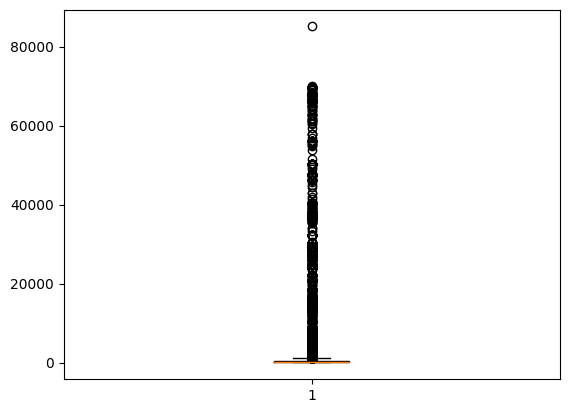

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df_new["actual_distance_to_destination"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q3 = np.quantile(df_new["actual_distance_to_destination"], 0.75)
Q1 = np.quantile(df_new["actual_distance_to_destination"], 0.25)
IQR1 = Q3-Q1
lower_limit = Q1 - 1.5*IQR1
upper_limit = Q3 + 1.5*IQR1
print("IQR_actual_distance_to_destination ", IQR1)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_actual_distance_to_destination  414.35902164748325
lower_limit  -571.9406664139941
upper_limit  1085.495420175939


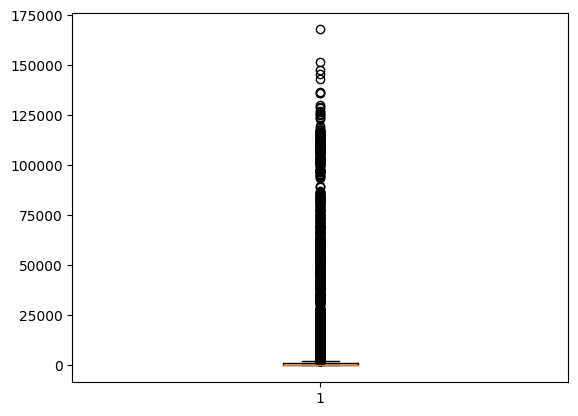

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df_new["actual_time"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q3 = np.quantile(df_new["actual_time"], 0.75)
Q1 = np.quantile(df_new["actual_time"], 0.25)
IQR2 = Q3-Q1
lower_limit = Q1 - 1.5*IQR2
upper_limit = Q3 + 1.5*IQR2
print("IQR_actual_time ", IQR2)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_actual_time  921.0
lower_limit  -1239.5
upper_limit  2444.5


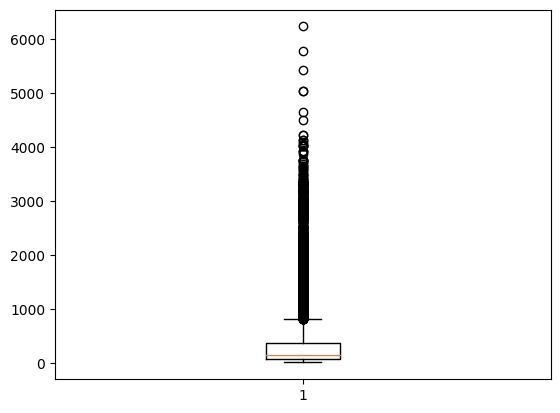

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df_new["segment_actual_time"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q3 = np.quantile(df_new["segment_actual_time"], 0.75)
Q1 = np.quantile(df_new["segment_actual_time"], 0.25)
IQR3 = Q3-Q1
lower_limit = Q1 - 1.5*IQR3
upper_limit = Q3 + 1.5*IQR3
print("IQR_segment_actual_time ", IQR3)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_segment_actual_time  301.0
lower_limit  -385.5
upper_limit  818.5


Calculating date, time from trip_creation_time column

In [ ]:
df_new["trip_creation_time"] = pd.to_datetime(df_new["trip_creation_time"])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14807 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14809 non-null  object        
 9   od_total_duration_by_hour       14817 non-null  float64       
 10  start_scan_to_end_scan          14817 non-null  float64       
 11  ac

In [ ]:
df_new["year"] = df_new["trip_creation_time"].dt.year
df_new["month"] = df_new["trip_creation_time"].dt.month
df_new["day"] = df_new["trip_creation_time"].dt.day
#df_new["week"] = df_new["trip_creation_time"].dt.week
df_new

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),43680.492537,...,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,2018,9,12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),913.174079,...,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,2018,9,12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),248694.383681,...,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678,2018,9,12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.989870,...,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,2018,9,12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),1588.710998,...,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),879.327869,...,141.057373,186.0,148.0,162.9473,82.0,62.0,64.8551,2018,10,3
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),121.181043,...,25.130640,33.0,19.0,26.5333,21.0,11.0,16.0883,2018,10,3
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1266.359600,...,93.743842,549.0,134.0,162.8499,281.0,88.0,104.8866,2018,10,3
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),1320.402557,...,355.281673,600.0,446.0,449.5383,258.0,221.0,223.5324,2018,10,3


Removing null values

In [ ]:
df_new.isnull().sum()

trip_uuid                          0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_total_duration_by_hour          0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
year                               0
month                              0
day                                0
dtype: int64

In [ ]:
df_new.dropna(inplace=True)
df_new.isnull().sum()

trip_uuid                         0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_total_duration_by_hour         0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
state = []
city=[]
date_after_split = df_new["destination_name"].str.split(r'\(|\)')
for i in date_after_split:
  state.append(i[1])
  city.append(i[0].split('_')[0])

df_new["state"] = state
df_new["city"] = city





In [ ]:
df_new.tail()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,state,city
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),879.327869,...,148.0,162.9473,82.0,62.0,64.8551,2018,10,3,Punjab,Chandigarh
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),121.181043,...,19.0,26.5333,21.0,11.0,16.0883,2018,10,3,Haryana,Faridabad
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1266.359600,...,134.0,162.8499,281.0,88.0,104.8866,2018,10,3,Uttar Pradesh,Kanpur
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),1320.402557,...,446.0,449.5383,258.0,221.0,223.5324,2018,10,3,Tamil Nadu,Tirunelveli
14816,trip-153861118270144424,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,IND583201AAA,Hospet (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),708.815143,...,106.0,127.8020,274.0,67.0,80.5787,2018,10,3,Karnataka,Bellary


In [ ]:
df_new.head(5)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,state,city
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),43680.492537,...,7787.0,10577.7647,1548.0,1008.0,1320.4733,2018,9,12,Haryana,Gurgaon
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),913.174079,...,210.0,269.4308,141.0,65.0,84.1894,2018,9,12,Karnataka,Chikblapur
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),248694.383681,...,65768.0,89447.2488,3308.0,1941.0,2545.2678,2018,9,12,Punjab,Chandigarh
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.989870,...,24.0,31.6475,59.0,16.0,19.8766,2018,9,12,Maharashtra,Mumbai
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),1588.710998,...,207.0,266.2914,340.0,115.0,146.7919,2018,9,12,Karnataka,Bellary


In [ ]:
df_new[df_new["city"]=="Mumbai Antop Hill "]["city"].count()

2

In [ ]:
df_new= df_new.replace(["Bangalore","PNQ Rahatani DPC ","PNQ Vadgaon Sheri DPC ","PNQ Pashan DPC ","Pune Balaji Nagar ","HBR Layout PC ","Bhopal MP Nagar ","Mumbai Antop Hill "],["Bengaluru", "Pune","Pune","Pune","Pune","Bengaluru","Bhopal","Mumbai"])
df_new.head(30)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,state,city
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),43680.492537,...,7787.0,10577.7647,1548.0,1008.0,1320.4733,2018,9,12,Haryana,Gurgaon
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),913.174079,...,210.0,269.4308,141.0,65.0,84.1894,2018,9,12,Karnataka,Chikblapur
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),248694.383681,...,65768.0,89447.2488,3308.0,1941.0,2545.2678,2018,9,12,Punjab,Chandigarh
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.989870,...,24.0,31.6475,59.0,16.0,19.8766,2018,9,12,Maharashtra,Mumbai
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),1588.710998,...,207.0,266.2914,340.0,115.0,146.7919,2018,9,12,Karnataka,Bellary
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),251.365798,...,30.0,38.1953,60.0,23.0,28.0647,2018,9,12,Tamil Nadu,Chennai
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.005634,...,13.0,12.0184,24.0,13.0,12.0184,2018,9,12,Tamil Nadu,Chennai
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),293.676793,...,65.0,54.2978,64.0,34.0,28.9203,2018,9,12,Karnataka,Bengaluru
8,trip-153671074033284934,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395023AAD,Surat_Central_I_4 (Gujarat),IND395023AAD,Surat_Central_I_4 (Gujarat),561.687995,...,50.0,53.8577,161.0,29.0,30.9358,2018,9,12,Gujarat,Surat
9,trip-153671079956500691,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),98.666780,...,16.0,19.9606,23.0,14.0,16.0860,2018,9,12,Delhi,Delhi


In [ ]:
df_new = df_new.drop(["trip_creation_time","destination_name"], axis=1)
df_new


,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,state,city
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,43680.492537,43659.0,8860.812105,...,7787.0,10577.7647,1548.0,1008.0,1320.4733,2018,9,12,Haryana,Gurgaon
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,913.174079,906.0,240.208306,...,210.0,269.4308,141.0,65.0,84.1894,2018,9,12,Karnataka,Chikblapur
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,248694.383681,248631.0,68163.502238,...,65768.0,89447.2488,3308.0,1941.0,2545.2678,2018,9,12,Punjab,Chandigarh
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,200.989870,200.0,28.529648,...,24.0,31.6475,59.0,16.0,19.8766,2018,9,12,Maharashtra,Mumbai
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,1588.710998,1586.0,239.007304,...,207.0,266.2914,340.0,115.0,146.7919,2018,9,12,Karnataka,Bellary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,879.327869,876.0,141.057373,...,148.0,162.9473,82.0,62.0,64.8551,2018,10,3,Punjab,Chandigarh
14813,trip-153861104386292051,test,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,121.181043,120.0,25.130640,...,19.0,26.5333,21.0,11.0,16.0883,2018,10,3,Haryana,Faridabad
14814,trip-153861106442901555,test,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,1266.359600,1263.0,93.743842,...,134.0,162.8499,281.0,88.0,104.8866,2018,10,3,Uttar Pradesh,Kanpur
14815,trip-153861115439069069,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,1320.402557,1315.0,355.281673,...,446.0,449.5383,258.0,221.0,223.5324,2018,10,3,Tamil Nadu,Tirunelveli


Univariate Analysis

<Axes: xlabel='state'>

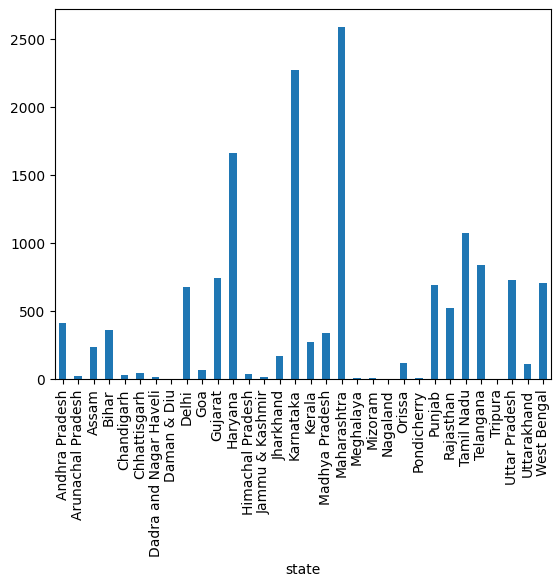

In [ ]:
df_new.groupby("state")["trip_uuid"].count().plot(kind="bar")

<Axes: xlabel='month'>

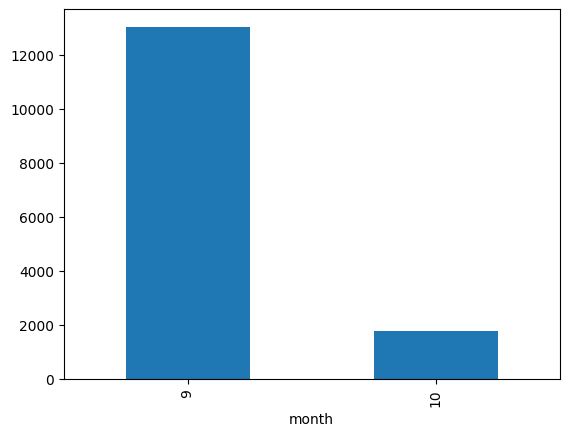

In [ ]:
df_new.groupby("month")["trip_uuid"].count().plot(kind="bar")

In [ ]:
df_new["delay"] = df_new["osrm_time"]-df_new["actual_time"]
df_new.head()

,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,state,city,delay
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,43680.492537,43659.0,8860.812105,...,10577.7647,1548.0,1008.0,1320.4733,2018,9,12,Haryana,Gurgaon,-7895.0
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,913.174079,906.0,240.208306,...,269.4308,141.0,65.0,84.1894,2018,9,12,Karnataka,Chikblapur,-189.0
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,248694.383681,248631.0,68163.502238,...,89447.2488,3308.0,1941.0,2545.2678,2018,9,12,Punjab,Chandigarh,-46457.0
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,200.989870,200.0,28.529648,...,31.6475,59.0,16.0,19.8766,2018,9,12,Maharashtra,Mumbai,-58.0
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,1588.710998,1586.0,239.007304,...,266.2914,340.0,115.0,146.7919,2018,9,12,Karnataka,Bellary,-349.0


<Axes: xlabel='data'>

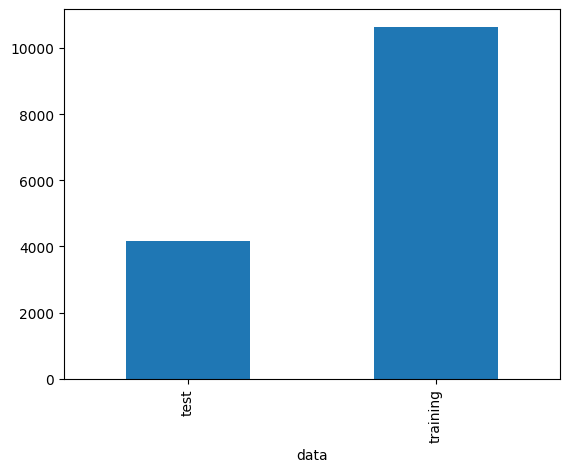

In [ ]:
df_new.groupby("data")["data"].count().plot(kind="bar")

In [ ]:
df_new.head()

,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,state,city,delay
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,43680.492537,43659.0,8860.812105,...,10577.7647,1548.0,1008.0,1320.4733,2018,9,12,Haryana,Gurgaon,-7895.0
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,913.174079,906.0,240.208306,...,269.4308,141.0,65.0,84.1894,2018,9,12,Karnataka,Chikblapur,-189.0
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,248694.383681,248631.0,68163.502238,...,89447.2488,3308.0,1941.0,2545.2678,2018,9,12,Punjab,Chandigarh,-46457.0
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,200.989870,200.0,28.529648,...,31.6475,59.0,16.0,19.8766,2018,9,12,Maharashtra,Mumbai,-58.0
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,1588.710998,1586.0,239.007304,...,266.2914,340.0,115.0,146.7919,2018,9,12,Karnataka,Bellary,-349.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14800 entries, 0 to 14816
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14800 non-null  object 
 1   data                            14800 non-null  object 
 2   route_schedule_uuid             14800 non-null  object 
 3   route_type                      14800 non-null  object 
 4   source_center                   14800 non-null  object 
 5   source_name                     14800 non-null  object 
 6   destination_center              14800 non-null  object 
 7   od_total_duration_by_hour       14800 non-null  float64
 8   start_scan_to_end_scan          14800 non-null  float64
 9   actual_distance_to_destination  14800 non-null  float64
 10  actual_time                     14800 non-null  float64
 11  osrm_time                       14800 non-null  float64
 12  osrm_distance                   14800

H0 = actual_distance_to_destination and osrm_distance are same

Ha = both are different

alpha = 0.05

In [ ]:
alpha = 0.05
actual_distance_to_destination =df_new["actual_distance_to_destination"].values
osrm_distance = df_new["osrm_distance"].values
t_stat,p_value = ttest_ind(actual_distance_to_destination,osrm_distance,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means actual distance to destination is not similar to algorithm generated distance.

algorithm needs to be improved

H0 = actual_time and osrm_time are same

Ha = both are different

alpha = 0.05

In [ ]:
alpha = 0.05
actual_time =df_new["actual_time"].values
osrm_time = df_new["osrm_time"].values
t_stat,p_value = ttest_ind(actual_time,osrm_time,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means actual time taken to destination is not similar to algorithm generated time.

algorithm needs to be improved

H0 = actual_time and segment_actual_time are same

Ha = both are different

alpha = 0.05

In [ ]:
alpha = 0.05
actual_time =df_new["actual_time"].values
segment_actual_time = df_new["segment_actual_time"].values
t_stat,p_value = ttest_ind(actual_time,segment_actual_time,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are fail to rejecting null hypothesis testing.

That means actual time taken to destination is similar to segment actual time taken


H0 = osrm_time and segment_osrm_time are same

Ha = both are different

alpha = 0.05

In [ ]:
alpha = 0.05
segment_osrm_time =df_new["segment_osrm_time"].values
osrm_time = df_new["osrm_time"].values
t_stat,p_value = ttest_ind(segment_osrm_time,osrm_time,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means segment osrm time taken is not similar to algorithm generated time.

algorithm needs to be improved

H0 = osrm_distance and segment_osrm_distance are same

Ha = both are different

alpha = 0.05

In [ ]:
alpha = 0.05
segment_osrm_distance =df_new["segment_osrm_distance"].values
osrm_distance = df_new["osrm_distance"].values
t_stat,p_value = ttest_ind(segment_osrm_distance,osrm_distance,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means segment osrm distance is not similar to algorithm generated distance.

algorithm needs to be improved

H0= 9th month and 10th month delivery packages counts are similar

Ha= 9th month and 10th month delivery packages counts are different

alpha=0.05

In [ ]:
alpha = 0.05
nineth_month = df_new[df_new["month"]=="9"]["trip_uuid"].values
tenth_month = df_new[df_new["month"]=="10"]["trip_uuid"].values
t_stat,p_value = ttest_ind(nineth_month,tenth_month,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [ ]:
df_new["route_type"].value_counts()

route_type
Carting    8906
FTL        5894
Name: count, dtype: int64

In [ ]:
#as we have only two values for route_type we will use label encoder
label_encoder = LabelEncoder()
col = "route_type"
df_new[col] = label_encoder.fit_transform(df_new[col])
df_new[col].value_counts()

route_type
0    8906
1    5894
Name: count, dtype: int64

Column Normalization /Column Standardization

In [ ]:
num_col = ['od_total_duration_by_hour','start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time','segment_osrm_distance',
           'segment_osrm_time','delay']
scaler = StandardScaler()
std_data = scaler.fit_transform(df_new[num_col])
std_data = pd.DataFrame(std_data,columns = df_new[num_col].columns)

In [ ]:
std_data

,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,delay
0,1.016115,1.015803,0.746356,0.762030,0.715224,0.723728,2.145792,2.632098,2.627782,-0.793318
1,-0.252013,-0.252127,-0.232971,-0.241805,-0.236550,-0.233888,-0.382853,-0.333835,-0.368793,0.241474
2,7.095144,7.094676,7.483324,7.103279,7.998420,8.050493,5.308844,5.570467,5.592580,-5.971578
3,-0.273130,-0.273065,-0.257018,-0.262627,-0.259914,-0.255978,-0.530223,-0.488126,-0.524500,0.259065
4,-0.231982,-0.231960,-0.233107,-0.231493,-0.236927,-0.234180,-0.025213,-0.183647,-0.209907,0.219989
...,...,...,...,...,...,...,...,...,...,...
14795,-0.253016,-0.253016,-0.244235,-0.255796,-0.244338,-0.243780,-0.488887,-0.380219,-0.378326,0.261751
14796,-0.275497,-0.275437,-0.257404,-0.265845,-0.260542,-0.256453,-0.598516,-0.497214,-0.540389,0.264974
14797,-0.241540,-0.241539,-0.249610,-0.231953,-0.246096,-0.243789,-0.131247,-0.284181,-0.295705,0.211126
14798,-0.239938,-0.239997,-0.219898,-0.228603,-0.206905,-0.217157,-0.172582,0.000459,0.126929,0.246174


**Insights:**
1. Karnataka and Maharashtra are leading in terms of package deliveries compared to other states.

2. The data suggests that the 9th month experiences a higher workload compared to the 10th month.

3. Weeks 38 and 39 exhibit a higher workload compared to other weeks based on the provided data.

4. Hypothesis testing reveals discrepancies between actual delivery time and distance compared to the algorithm's estimations.

5. Similarly, there are disparities between segment time and distance compared to the algorithm's estimations.

6. Notably, actual delivery time aligns closely with segment time based on hypothesis testing.

7. There's a similarity in delivery counts between the 9th and 10th months, as indicated by hypothesis testing.

**Recommendations:**
1. Enhance infrastructure and logistics support in other states to boost traffic and improve delivery efficiency.

2. Prioritize customer satisfaction in Karnataka and Maharashtra by ensuring timely deliveries due to the high traffic volume.

3. Focus on refining the algorithm to better align with actual delivery times and distances by incorporating more comprehensive data and implementing upgrades.

4. Given the surge in delivery counts during the festive season in September and October, ensure timely deliveries to meet customer expectations.